In [58]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [60]:
np.random.seed(42)

In [61]:
def f(x: np.ndarray) -> np.ndarray:
    return x * np.sin(x)

In [62]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

In [63]:
y = f(X).ravel()
y

array([ 0.00998334,  0.35568195,  1.02417483,  1.64254128,  1.79460874,
        1.19565939, -0.16970179, -1.99898665, -3.736799  , -4.74001164,
       -4.49479012, -2.81606696,  0.03955032,  3.39366403,  6.30578855,
        7.83569104,  7.33552339,  4.68337814,  0.38058894, -4.52960535])

In [64]:
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
x.shape

(1000, 1)

In [65]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [66]:
model.fit(X, y)

/Users/wararaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [67]:
y_pred, sigma = model.predict(x, return_std=True)

/Users/wararaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:370: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [68]:
print(y_pred.shape)
sigma.shape

(1000,)


(1000,)

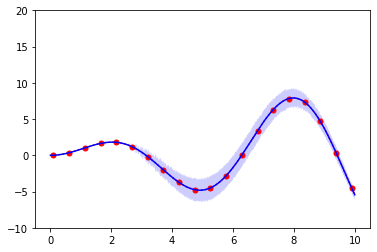

In [69]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, f(x), 'r:')
ax.plot(X, y, 'r.', markersize=10)
ax.plot(x, y_pred, 'b-')
ax.fill_between(
    x.ravel(),
    y_pred-sigma,
    y_pred+sigma,
    alpha=0.2, fc='b', ec='None'
)
plt.ylim(-10, 20)
plt.show()

In [70]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

In [71]:
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

In [72]:
model = GaussianProcessRegressor(
    kernel=kernel,
    alpha=dy**2,
    n_restarts_optimizer=10
)

In [73]:
model.fit(X, y)

GaussianProcessRegressor(alpha=array([0.86852152, 0.62604355, 1.23621686, 0.4089524 , 0.62749314,
       0.75058284, 0.91406981, 1.65167725, 0.4895434 , 1.0286715 ,
       1.19336959, 0.29860805, 1.2266556 , 0.4496026 , 0.3192833 ,
       2.0992693 , 2.14807726, 1.71190362, 0.64740332, 0.35721196]),
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

In [74]:
y_pred, sigma = model.predict(x, return_std=True)

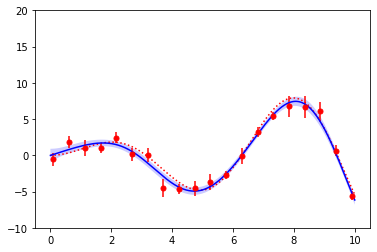

In [75]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, f(x), 'r:')
ax.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10)
ax.plot(x, y_pred, 'b-')
ax.fill_between(
    x.ravel(),
    y_pred-sigma,
    y_pred+sigma,
    alpha=0.2, fc='b', ec='None'
)
plt.ylim(-10, 20)
plt.show()